In [14]:
%config ZMQInteractiveShell.ast_node_interactivity = "all"
%pprint

Pretty printing has been turned OFF


## 朴素贝叶斯的连续值处理

对于连续变量，往往不能采用离散变量的方法计算概率
1. 当数据量充足时，可以将连续变量离散化，即分成区间来计算
2. 当数据量太少时，则无法分成区间计算，此时可以假设连续变量服从某一分布（根据大数定律，通常为正态分布）。通过样本计算出均值和方差可以得到密度函数，从密度函数就可以计算某一点的密度函数的值。（求连续型随机变量在某一取值点的概率时，可以看成该点的密度函数取值越大，概率越大。但是这一密度函数的值不和概率相等---连续变量在某一点的概率为0，只可以比大小用）

概率密度例子：

ID|height(cm)|weight(kg)|shoe_size|gender
:-:|:-:|:-:|:-:|:-:
1|183|82|45|男
2|178|77|43|男
3|172|70|42|男
4|168|65|41|男
5|160|50|37|女
6|156|44|36|女
7|163|54|38|女
8|158|48|35|女

现在有一个新样本，身高为170，体重为60，鞋码为41，该人是男or女？

思路：
1. 把身高/体重/鞋码看成连续变量
    - 在这里把鞋码看成离散变量显然是不妥的---因为样本量太少了，将其看成连续变量求其分布更为恰当（尽管可能是有偏的）
2. 其实就是计算概率：
\begin{cases}
p1 = p(Y = male)p(X = height|Y = male)p(X = weight|Y= male)p(X = shoe\_size|Y = male)\\
p2 = p(Y = female)p(X = height|Y = female)p(X = weight|Y= female)p(X = shoe\_size|Y = female)
\end{cases}
    - 当p1 > p2时，该人为男；当p2 > p1，该人为女
3. 对于男女的概率，根据国家统计局数据，2020年总人口性别比为104.45(女性为100)
4. 对于身高/体重/鞋码，先分别求其均值和标准差，再求新样本各特征的概率密度值

In [176]:
import numpy as np
from scipy import stats as st

# 身高/体重/鞋码
height = np.array([183, 178, 172, 168, 160, 156, 163, 158])
weight = np.array([82, 77, 70, 65, 50, 44, 54, 48])
shoe_size = np.array([45, 43, 42, 40, 37, 36, 38, 35])

# 身高均值/标准差
male_height_mean = height[:4].mean()
male_height_std = height[:4].std()
female_height_mean = height[-4:].mean()
female_height_std = height[-4:].std()
print("男生的身高均值为%f, 标准差为%f, 女生的身高均值为%f, 标准差为%f" \
     %(male_height_mean, male_height_std, female_height_mean, female_height_std))

# 体重的均值/标准差
male_weight_mean = weight[:4].mean()
male_weight_std = weight[:4].std()
female_weight_mean = weight[-4:].mean()
female_weight_std = weight[-4:].std()
print("男生的体重均值为%f, 标准差为%f, 女生的体重均值为%f, 标准差为%f" \
     %(male_weight_mean, male_weight_std, female_weight_mean, female_weight_std))

# 鞋码均值/标准差
male_shoe_mean = shoe_size[:4].mean()
male_shoe_std = shoe_size[:4].std()
female_shoe_mean = shoe_size[-4:].mean()
female_shoe_std = shoe_size[-4:].mean()
print("男生的鞋码均值为%f, 标准差为%f, 女生的鞋码均值为%f, 标准差为%f" \
     %(male_shoe_mean, male_shoe_std, female_shoe_mean, female_shoe_std))

男生的身高均值为175.250000, 标准差为5.717298, 女生的身高均值为159.250000, 标准差为2.586020
男生的体重均值为73.500000, 标准差为6.500000, 女生的体重均值为49.000000, 标准差为3.605551
男生的鞋码均值为42.500000, 标准差为1.802776, 女生的鞋码均值为36.500000, 标准差为36.500000


In [177]:
# 男女概率
p_male, p_female = 104.45/(104.45 + 100), 100/(104.45 + 100)

# 男的身高/体重/鞋码的条件概率
p_male_height = st.norm.pdf(x = 170, loc = male_height_mean, scale = male_height_std)
p_male_weight = st.norm.pdf(x = 60, loc = male_weight_mean, scale = male_weight_std)
p_male_shoe_size = st.norm.pdf(x = 41, loc = male_shoe_mean, scale = male_shoe_std)

# 女的身高/体重/鞋码的条件概率
p_female_height = st.norm.pdf(x = 170, loc = female_height_mean, scale = female_height_std)
p_female_weight = st.norm.pdf(x = 60, loc = female_weight_mean, scale = female_weight_std)
p_female_shoe_size = st.norm.pdf(x = 41, loc = female_shoe_mean, scale = female_shoe_std)

# p1
p1 = p_male * p_male_height * p_male_weight * p_male_shoe_size
p2 = p_female * p_female_height * p_female_weight * p_female_shoe_size

if p1 > p2:
    print("p1 = %e, p2 = %e, 该人为男" %(p1, p2))
else:
    print("p1 = %e, p2 = %e, 该人为女" %(p1, p2))

p1 = 2.599461e-05, p2 = 1.525530e-10, 该人为男


In [94]:
import pandas as pd

data = pd.DataFrame({
    "height":[183, 178, 172, 168, 160, 156, 163, 158],
    "weight":[82, 77, 70, 65, 50, 44, 54, 48], 
    "shoe_size":[45, 43, 42, 40, 37, 36, 38, 35],
    "gender":["male", "male", "male", "male", "female", "female", "female", "female"]
})

data

,height,weight,shoe_size,gender
0,183,82,45,male
1,178,77,43,male
2,172,70,42,male
3,168,65,40,male
4,160,50,37,female
5,156,44,36,female
6,163,54,38,female
7,158,48,35,female


In [126]:
import numpy as np
import scipy.stats as st

class Gaussian_bayes(object):
    """
    功能：根据高斯（正态）分布处理贝叶斯的连续值情况
    属性 classes：标记的类别
    属性 classes_count：标记各类别的数量
    属性 classes_prob：标记各类别的概率
    属性 mu：各特征的均值构成的字典
    属性 sigma：各特征的标准差构成的字典
    属性 prob_array：接收新样本对应于各类别的概率值
    """
    def __init__(self):
        self.classes = np.array([])
        self.classes_count = {}
        self.classes_prob = {}
        self.mu = {}
        self.sigma = {}
        self.prob_array = np.array([])
        
    def fit(self, feature, label):
        """
        功能：分类器的拟合
        参数 feature：接收特征变量的ndarray
        参数 label：接收分类标记的ndarray
        """
        label_count = np.unique(label, return_counts = True)
        # clf为标记类别，clf_count为类别对应的数量
        for clf, clf_count in zip(label_count[0], label_count[1]):
            # 各类别对应的样本
            sample_clf = feature[label == clf]
            # 各类别样本特征的均值/标准差
            self.mu[clf] = [sample_clf.mean(axis = 0)]
            self.sigma[clf] = [sample_clf.std(axis = 0)]
            # 标记类别及其对应的数量概率
            self.classes = np.append(self.classes, clf)
            self.classes_count[clf] = clf_count
            self.classes_prob[clf] = clf_count / label.shape[0]
        
        return "fit Gaussian_NB"
    
    def predict(self, feature):
        """
        功能：用于高斯贝叶斯分类器的预测
        参数 feature：接收的是要预测的特征向量array_like(可以多个)
        """
        # 接收属于各类的相对值(用于不叫大小)
        prob_list = []
        
        for clf in self.classes:
            class_feature_loc = self.mu[clf]
            class_feature_scale = self.sigma[clf]
            # 每一类各特征的概率密度值
            class_feature_pdf = st.norm.pdf(x = feature, loc = class_feature_loc, \
                                            scale = class_feature_scale)
            # 属于各类的相对值
            prob_list.extend([class_feature_pdf.prod(axis = 1) * self.classes_prob[clf]])
            
        self.prob_array = np.array(prob_list)
        
        return self.classes[self.prob_array.argmax(axis = 0)]
    
    def get_classes(self):
        """
        功能：获取类别及其数量概率
        字典结果 元素1：类别的数量
        字典结果 元素2：类别的概率
        """
        classes_dict = {}
        
        for clf in self.classes:
            classes_dict[clf] = (self.classes_count[clf], self.classes_prob[clf])
            
        return classes_dict
    
    def get_prob(self):
        """
        功能：获取各类的概率
        """
        prob_dict = {}
        prob_zip = zip(self.classes, self.prob_array)
        
        for clf, prob in prob_zip:
            prob_dict[clf] = prob
            
        return prob_dict
    
    def score(self, x_test, y_test):
        """
        功能:计算分类器的分类精度
        参数 x_test:测试样本
        参数 y_test:测试样本对应的标记
        """
        # 分类器的预测结果
        label = self.predict(x_test) 
        # 分类正确的数量
        right_count = (label == y_test).sum()
        # 分类器的精度
        acc = right_count/len(y_test)
        
        return acc

In [124]:
# 生成分类器
clf = Gaussian_bayes()

# 生成训练样本数据和标记数据
x = np.array(data.iloc[:, :3])
y = np.array(data.iloc[:, -1])

# 分类器拟合
clf.fit(x, y)
# 分类器预测
clf.predict([[170, 60, 41],[168, 56, 40], [156, 44, 37]])
# 获取类别,数量即其概率
clf.get_classes()
# 获取分类概率
prob = clf.get_prob()
prob_zip = zip(prob["female"], prob["male"])
for female, male in prob_zip:
    print("女生的概率为：%e，男生的概率为：%e" %(female, male))

# 概率修正，使用统计局的男女概率
female_prob = prob["female"] / 0.5 * (100/204.45)
male_prob = prob["male"] / 0.5 * (104.45/204.45)
prob_zip = zip(female_prob, male_prob)
print("\n")
for female, male in prob_zip:
    print("女生修正后的概率为:%e, 男生修正后的概率为:%e" %(female, male))

'fit Gaussian_NB'

array(['male', 'male', 'female'], dtype='<U32')

{'female': (4, 0.5), 'male': (4, 0.5)}

女生的概率为：1.557152e-12，男生的概率为：2.544087e-05
女生的概率为：1.124836e-08，男生的概率为：2.162160e-06
女生的概率为：4.782450e-04，男生的概率为：5.249299e-13


女生修正后的概率为:1.523260e-12, 男生修正后的概率为:2.599461e-05
女生修正后的概率为:1.100353e-08, 男生修正后的概率为:2.209221e-06
女生修正后的概率为:4.678357e-04, 男生修正后的概率为:5.363554e-13


In [98]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 

In [140]:
# 莺尾花数据集
iris = load_iris()
iris_data = iris["data"]
iris_label = iris['target']

# 数据集划分
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label)

# 自定义分类器生成/拟合/预测/得分
clf1 = Gaussian_bayes()
clf1.fit(x_train, y_train)
print(clf1.predict(x_test))
print(y_test)
clf1.score(x_test, y_test)

# sklearn的分类器生成
clf2 = GaussianNB()
clf1.fit(x_train, y_train)
clf1.score(x_test, y_test)

'fit Gaussian_NB'

[1. 0. 0. 1. 1. 1. 1. 1. 0. 2. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 1. 0. 2.
 0. 2. 1. 0. 2. 0. 1. 2. 1. 1. 0. 2. 1. 2.]
[2 0 0 1 1 1 1 1 0 2 2 1 1 0 1 1 1 1 2 0 0 1 0 2 0 2 1 0 2 0 1 2 1 1 0 2 1
 2]


0.9473684210526315

'fit Gaussian_NB'

0.9473684210526315

In [193]:
# 分类器3,只使用第1和2列特征---为了方便画图
clf3 = Gaussian_bayes()
clf3.fit(x_train[:, :2], y_train)
clf3.score(x_test[:, :2], y_test)

'fit Gaussian_NB'

0.7894736842105263

(4.0, 8.0)

(2.0, 4.0)

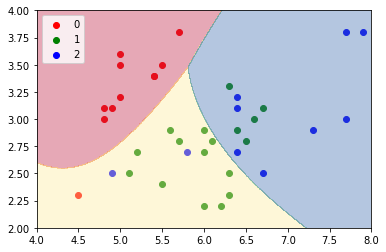

In [237]:
import matplotlib.pyplot as plt

x = x_test[:, :2]
plt.scatter(x[y_test == 0][:, 0], x[y_test == 0][:, 1], color = 'red', label = '0')
plt.scatter(x[y_test == 1][:, 0], x[y_test == 1][:, 1], color = 'green', label = '1')
plt.scatter(x[y_test == 2][:, 0], x[y_test == 2][:, 1], color = 'blue', label = '2')
plt.legend()

x_min = x[:, 0].min()
x_max = x[:, 0].max()
y_min = x[:, 1].min()
y_max = x[:, 1].max()

x = np.linspace(np.floor(x_min), np.ceil(x_max), 1000)
y = np.linspace(np.floor(y_min), np.ceil(y_max), 1000)
xx1, xx2 = np.meshgrid(x, y)
z = clf3.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
z = z.reshape(xx1.shape)
plt.contourf(xx1, xx2, z, alpha=0.4, cmap = plt.cm.Spectral)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

# plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test.reshape(-1), cmap = plt.cm.seismic)